In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
df = pd.read_excel("premiums_rest.xlsx")
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610


In [3]:
df["Genetical_Risk"]=0

In [4]:
df.shape

(29904, 14)

In [5]:
df.columns = df.columns.str.replace(" ","_").str.lower()
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0


In [6]:
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [7]:
# as the dataset is of 50k values we can drop them as it can not be that much efficient

In [8]:
df.dropna(inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [9]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.0
mean,43.396105,2.379910,23.364184,20892.303821,0.0
std,13.412657,1.431201,24.740339,6936.813440,0.0
min,26.000000,-3.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15697.250000,0.0
50%,42.000000,3.000000,17.000000,20489.000000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


In [11]:
df[df.number_of_dependants < 0]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
1805,34,Female,Southeast,Married,-1,Underweight,Regular,Self-Employed,25L - 40L,35,High blood pressure & Heart disease,Silver,22995,0
2273,41,Male,Southwest,Married,-1,Obesity,Regular,Salaried,10L - 25L,21,Diabetes,Silver,22766,0
3513,56,Male,Southwest,Married,-3,Normal,Occasional,Salaried,10L - 25L,16,Thyroid,Bronze,11979,0
3904,26,Male,Southeast,Married,-1,Obesity,Occasional,Freelancer,25L - 40L,27,No Disease,Silver,18269,0
4900,37,Male,Northwest,Married,-1,Overweight,Regular,Self-Employed,<10L,8,Diabetes,Bronze,13664,0
5917,42,Female,Southeast,Unmarried,-3,Overweight,Regular,Self-Employed,<10L,8,Diabetes & Heart disease,Bronze,17779,0
7095,50,Female,Northwest,Married,-3,Normal,Occasional,Salaried,<10L,4,Diabetes & High blood pressure,Silver,21957,0
7222,47,Male,Northwest,Unmarried,-3,Overweight,Occasional,Self-Employed,10L - 25L,19,No Disease,Gold,27457,0
7551,39,Male,Southwest,Unmarried,-1,Overweight,Occasional,Self-Employed,25L - 40L,40,High blood pressure,Silver,18406,0
9047,47,Male,Northwest,Married,-1,Overweight,Occasional,Self-Employed,25L - 40L,27,High blood pressure,Gold,29812,0


In [12]:
df[df.number_of_dependants < 0]["number_of_dependants"].unique()

array([-1, -3])

In [13]:
df["number_of_dependants"] = abs(df["number_of_dependants"])
df["number_of_dependants"].describe()

count    29886.000000
mean         2.385933
std          1.421137
min          0.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

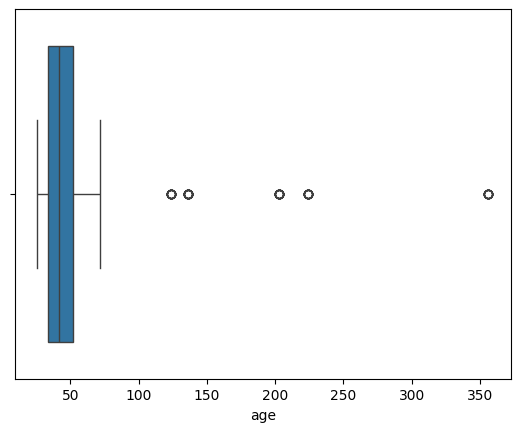

In [14]:
sns.boxplot(x=df["age"])
plt.show()

In [15]:
df.select_dtypes(["float64","int64"])

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
0,26,0,6,9053,0
1,29,2,6,16339,0
2,49,2,20,18164,0
3,30,3,77,20303,0
4,56,3,14,15610,0
...,...,...,...,...,...
29899,60,3,26,26370,0
29900,40,0,16,29496,0
29901,37,0,4,10957,0
29902,47,2,82,27076,0


In [16]:
numeric_features = df.select_dtypes(["float64","int64"]).columns
numeric_features

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

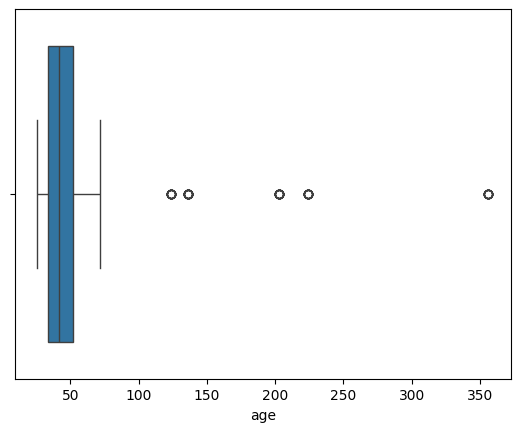

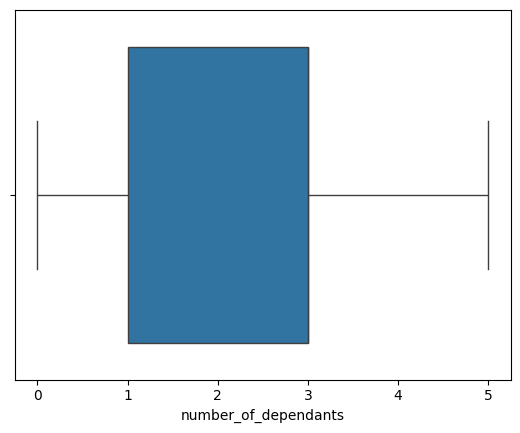

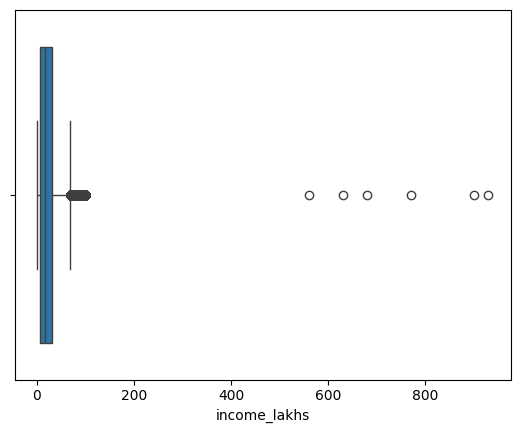

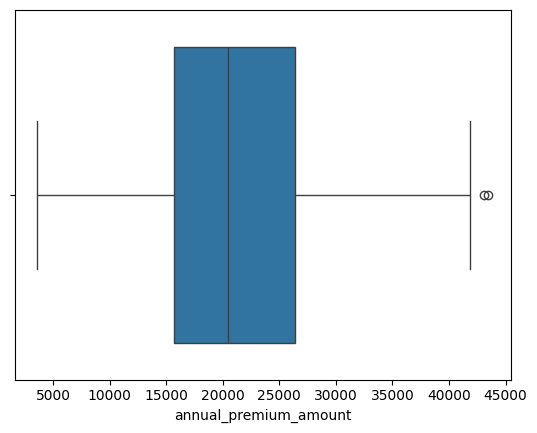

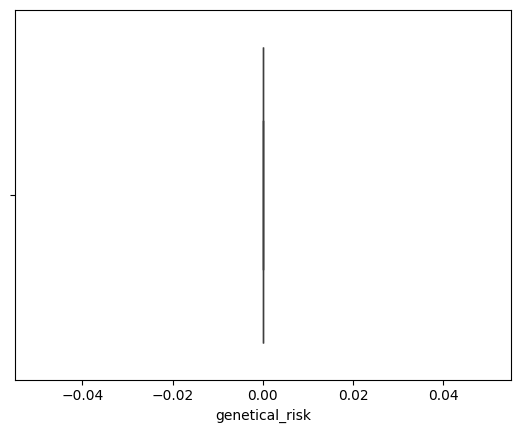

In [17]:
for col in numeric_features :
    sns.boxplot(x=df[col])
    plt.show()

In [18]:
df[df["age"]>100]["age"].unique()

array([224, 124, 136, 203, 356])

In [19]:
df[df["age"]>100]["age"].shape

(58,)

In [20]:
# 58 is less so we can drop then instead of giving mean median mode

In [21]:
df1 = df[df["age"]<=100].copy()
df1.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0


In [22]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29828.000000,29828.000000,29828.000000,29828.000000,29828.0
mean,43.095380,2.387790,23.371530,20901.900563,0.0
std,11.041991,1.420641,24.751262,6928.457636,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15706.000000,0.0
50%,42.000000,3.000000,17.000000,20496.000000,0.0
75%,52.000000,3.000000,32.000000,26361.000000,0.0
max,72.000000,5.000000,930.000000,43471.000000,0.0


<Axes: xlabel='income_lakhs', ylabel='Count'>

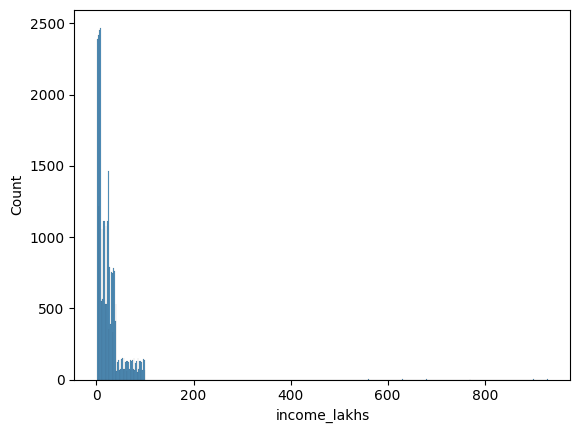

In [23]:
sns.histplot(df["income_lakhs"])

In [24]:
def get_iqr_bounds(col) :
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound =  q1 - 1.5*iqr
    upper_bound =  q3 + 1.5*iqr
    return lower_bound,upper_bound

In [25]:
lower_bound_income,upper_bound_income = get_iqr_bounds(df1["income_lakhs"])
lower_bound_income,upper_bound_income

(np.float64(-30.5), np.float64(69.5))

In [26]:
# a person can has 67 lakhs and more in india so we choose diff method

In [27]:
quantile_threshold = df1.income_lakhs.quantile(0.999)
quantile_threshold

np.float64(100.0)

In [28]:
df1[df1.income_lakhs > quantile_threshold].shape

(6, 14)

In [29]:
df2 = df1[df1.income_lakhs <= quantile_threshold].copy()
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0


In [30]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.0
mean,43.094896,2.387734,23.226343,20900.689223,0.0
std,11.042430,1.420644,22.455408,6928.192115,0.0
min,26.000000,0.000000,1.000000,6538.000000,0.0
25%,34.000000,1.000000,7.000000,15705.250000,0.0
50%,42.000000,3.000000,17.000000,20495.500000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,72.000000,5.000000,100.000000,43471.000000,0.0


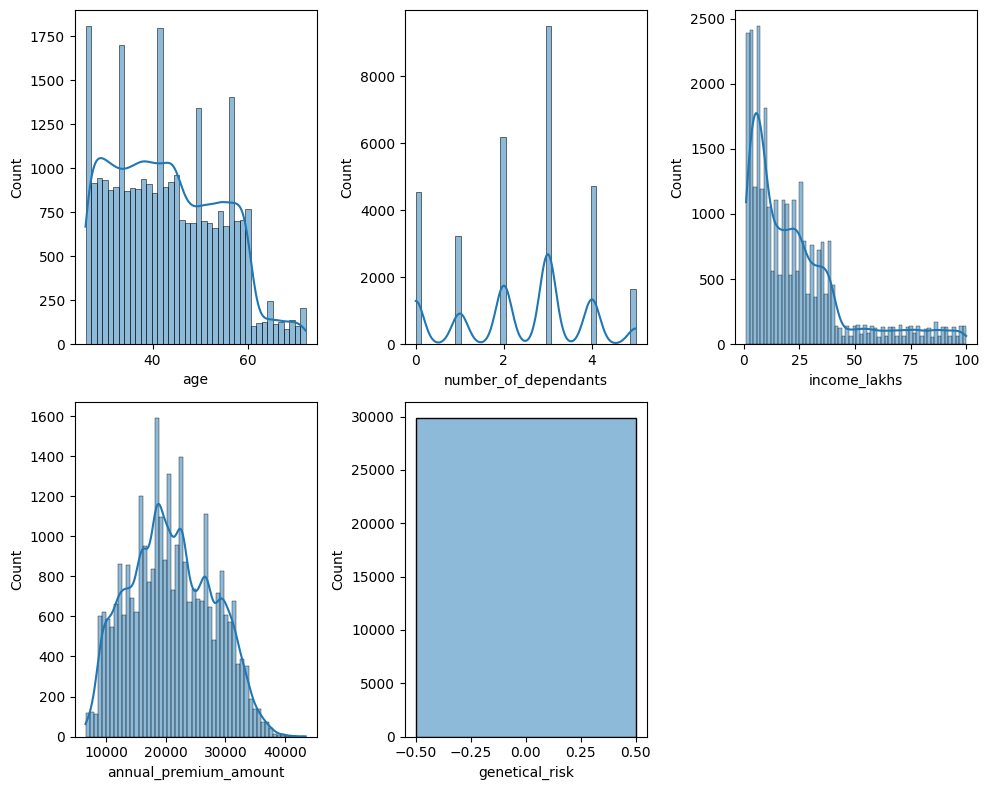

In [31]:
fig, axs = plt.subplots(2, 3, figsize=(10, 8))
axs = axs.flatten()

for i, col in enumerate(numeric_features):
    sns.histplot(df2[col], kde=True, ax=axs[i])
    axs[i].set_xlabel(col)

for j in range(len(numeric_features), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


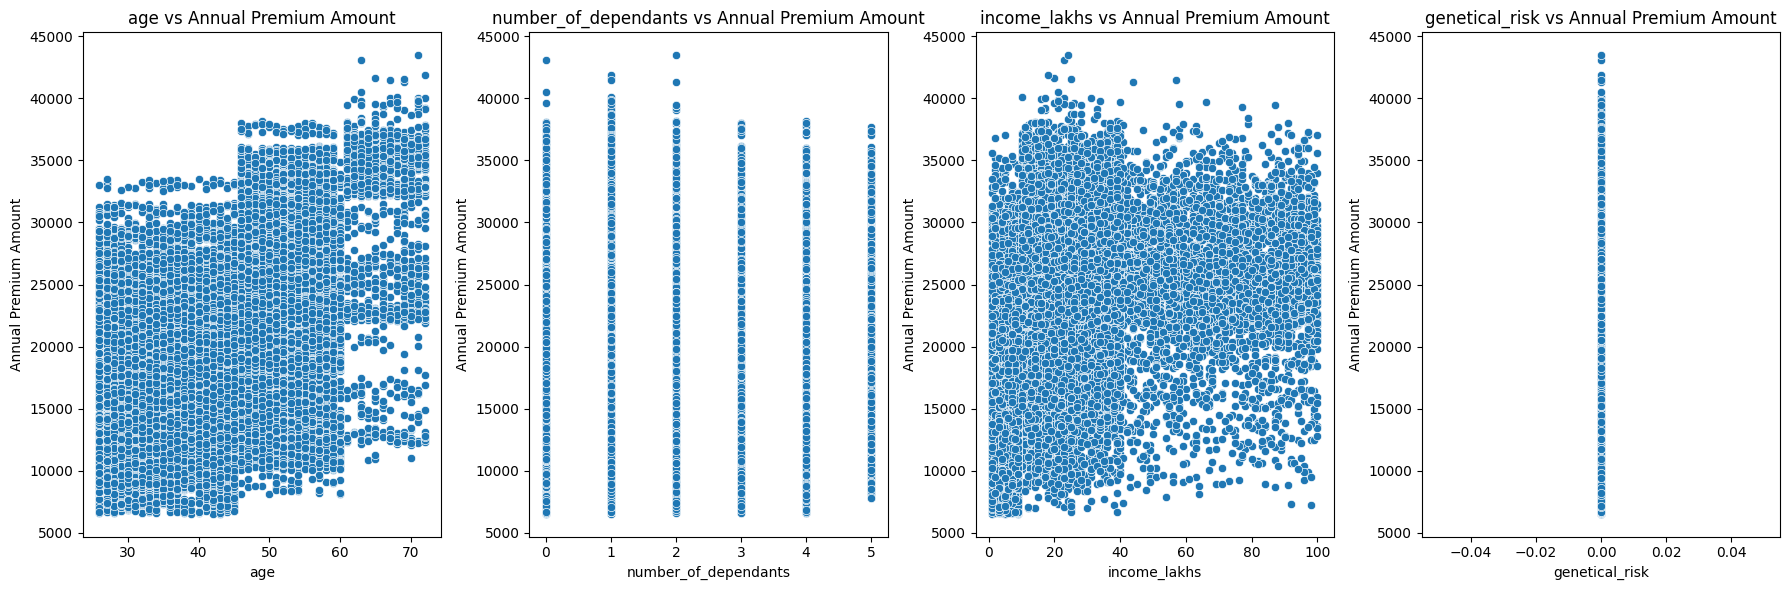

In [32]:
# Exclude 'annual_premium_amount' first
features_to_plot = [col for col in numeric_features if col != "annual_premium_amount"]

# Create one subplot per feature
fig, axs = plt.subplots(1, len(features_to_plot), figsize=(18, 6))

# Loop and plot
for ax, col in zip(axs, features_to_plot):
    sns.scatterplot(x=df2[col], y=df2["annual_premium_amount"], ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel("Annual Premium Amount")
    ax.set_title(f"{col} vs Annual Premium Amount")

plt.tight_layout()
plt.show()


In [33]:
categorical_columns = df2.select_dtypes("object").columns
categorical_columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [34]:
for col in categorical_columns :
    print(f"{col} : {df2[col].unique()}")

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [35]:
df2['smoking_status'].replace({
    "Smoking=0" : "No Smoking",
    "Does Not Smoke" : "No Smoking",
    "Not Smoking" : "No Smoking"
},inplace=True)


C:\Users\msart\AppData\Local\Temp\ipykernel_31064\4108123457.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({


In [36]:
for col in categorical_columns :
    print(f"{col} : {df2[col].unique()}")

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [37]:
pct = df2["gender"].value_counts()
pct

gender
Male      16376
Female    13446
Name: count, dtype: int64

<Axes: xlabel='gender'>

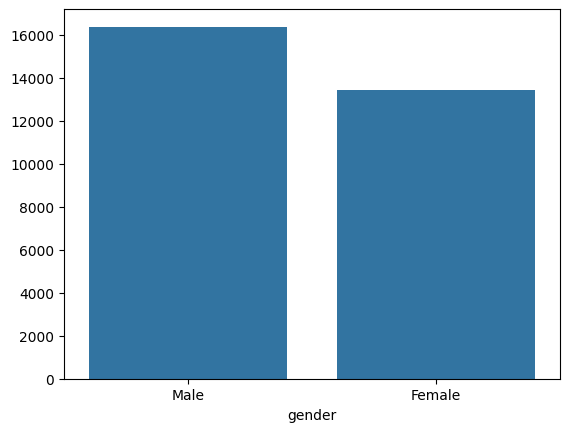

In [38]:
sns.barplot(x=pct.index,y=pct.values)

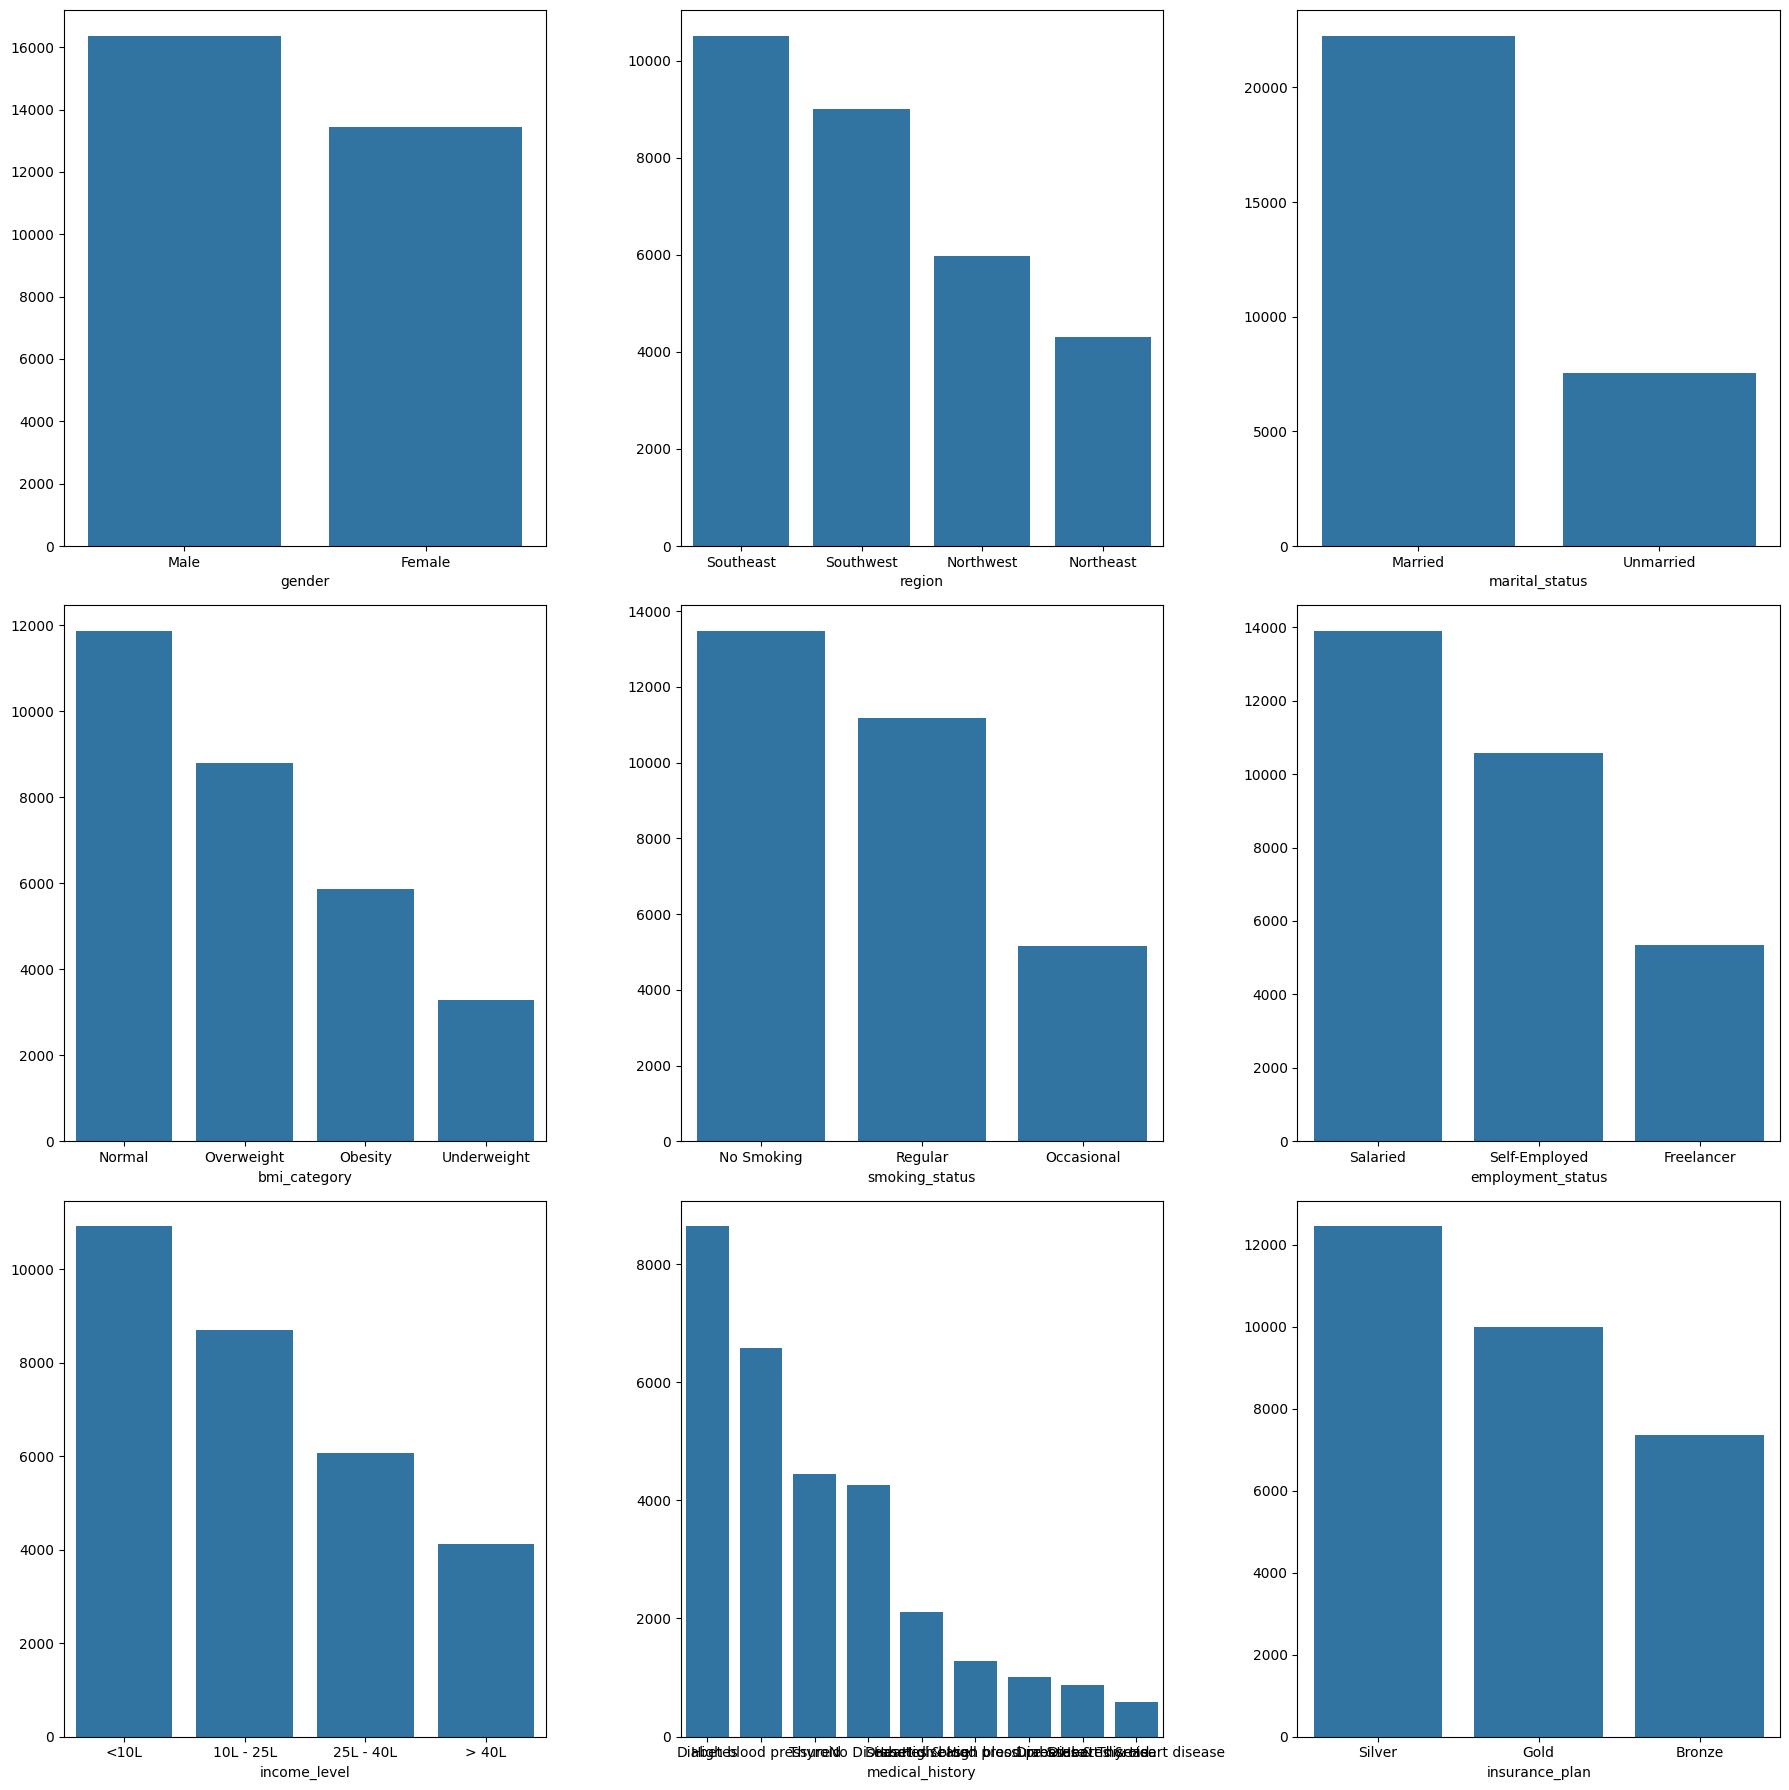

In [39]:
#univariate analysis
fig,axs = plt.subplots(3,3,figsize=(18,18))
axs = axs.flatten()
for i,col in enumerate(categorical_columns) :
    categorical_pct = df2[col].value_counts()
    sns.barplot(x=categorical_pct.index,y=categorical_pct.values,ax=axs[i])
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [40]:
crosstab = pd.crosstab(df2["income_level"],df2["insurance_plan"])
crosstab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,799,3554,4354
25L - 40L,301,2631,3142
<10L,6054,527,4341
> 40L,214,3287,618


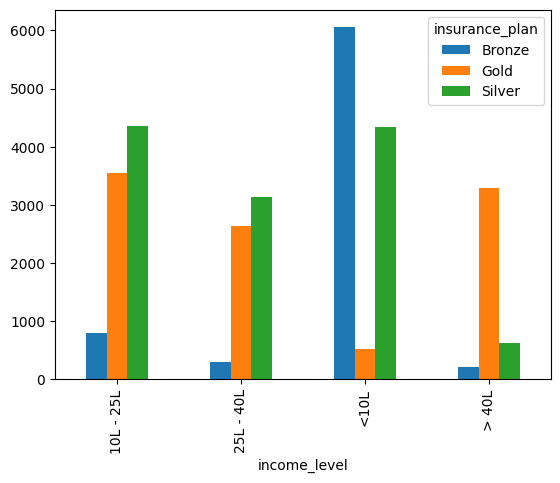

In [41]:
crosstab.plot(kind="bar")
plt.show()

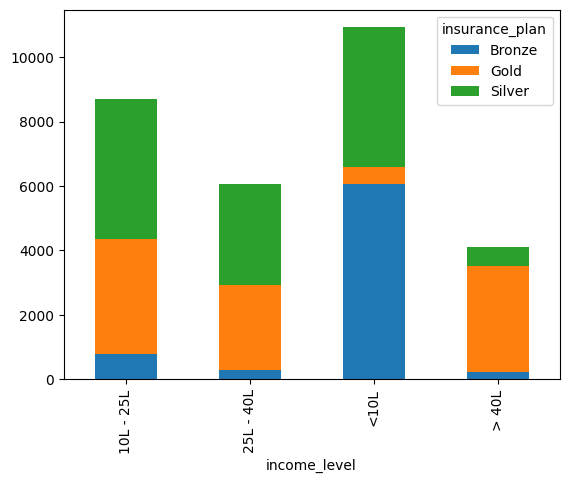

In [42]:
crosstab.plot(kind="bar",stacked = True)
plt.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

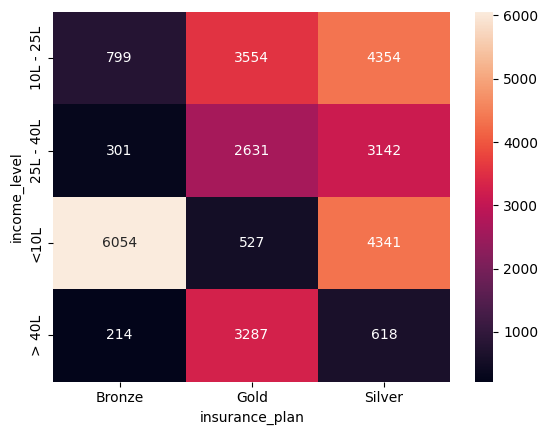

In [43]:
sns.heatmap(crosstab,annot=True,fmt="d")

In [44]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0


In [45]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [46]:
risk_scores = {
    "diabetes" : 6,
    "high blood pressure" : 6,
    "no disease" : 0,
    "thyroid" : 5,
    "heart disease" : 8,
    "none" : 0
}
df2[["disease1","disease2"]] = df2["medical_history"].str.lower().str.strip().str.split(" & ", expand=True).apply(lambda x: x.str.strip()) 

In [47]:
df2.head(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,None
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,None
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0,high blood pressure,None
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0,no disease,None
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0,diabetes,None


In [48]:
df2['disease1'].fillna("none",inplace=True)
df2['disease2'].fillna("none",inplace=True)
df2.head()

C:\Users\msart\AppData\Local\Temp\ipykernel_31064\2289181906.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna("none",inplace=True)
C:\Users\msart\AppData\Local\Temp\ipykernel_31064\2289181906.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,none
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,none
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0,high blood pressure,none
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0,no disease,none
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0,diabetes,none


In [49]:
df2["total_risk_score"] = 0 

df2["total_risk_score"] = sum(df2[col].map(risk_scores) for col in ["disease1", "disease2"])
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,none,6
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,none,6
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0,high blood pressure,none,6
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0,no disease,none,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0,diabetes,none,6


In [50]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
df2["total_risk_score"] = minmax.fit_transform(df2[["total_risk_score"]])
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,none,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,none,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0,high blood pressure,none,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0,no disease,none,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0,diabetes,none,0.428571


In [51]:
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [52]:
# we can do label encoding
label_insurance = {
    "Bronze" : 1,
    "Silver" : 2,
    "Gold" : 3
}
df2["insurance_plan"] = df2["insurance_plan"].map(label_insurance)
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,1,9053,0,diabetes,none,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,1,16339,0,diabetes,none,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,2,18164,0,high blood pressure,none,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,3,20303,0,no disease,none,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,1,15610,0,diabetes,none,0.428571


In [53]:
df2["income_level"].unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [54]:
label_income_level = {
    '<10L' : 1, '10L - 25L' :2, '> 40L' : 3, '25L - 40L' :4
}
df2["income_level"] = df2["income_level"].map(label_income_level)
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,1,6,Diabetes,1,9053,0,diabetes,none,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,1,6,Diabetes,1,16339,0,diabetes,none,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,2,20,High blood pressure,2,18164,0,high blood pressure,none,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,3,77,No Disease,3,20303,0,no disease,none,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,2,14,Diabetes,1,15610,0,diabetes,none,0.428571


In [55]:
nominal_cols = ["gender","region","marital_status","bmi_category","smoking_status","employment_status"]
df3 = pd.get_dummies(df2,columns=nominal_cols,drop_first=True,dtype=int)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,0,diabetes,none,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,0,diabetes,none,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,0,high blood pressure,none,...,0,0,0,0,0,0,0,0,0,1
3,30,3,3,77,No Disease,3,20303,0,no disease,none,...,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,Diabetes,1,15610,0,diabetes,none,...,0,0,0,1,0,0,1,0,0,1


In [56]:
df3.drop(["disease1","disease2","medical_history"],inplace=True,axis=1)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,total_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,3,77,3,20303,0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,1,15610,0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [57]:
cm = df3.corr()
cm

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,total_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
age,1.000000,-0.017614,0.041215,0.024253,0.310446,0.484715,NaN,0.002473,-0.003699,0.001752,-0.002130,-0.003622,-0.123857,0.014732,0.017585,0.005224,-0.053572,-0.126481,-0.198537,0.270621
number_of_dependants,-0.017614,1.000000,0.001864,-0.000640,0.010334,0.015969,NaN,0.106168,-0.000594,-0.002981,0.000732,0.007047,-0.777352,0.019413,0.014560,-0.021186,0.011848,0.013306,0.012497,-0.015319
income_level,0.041215,0.001864,1.000000,0.663170,0.498690,0.408491,NaN,0.017136,0.089400,-0.001232,-0.001617,0.007845,-0.011423,-0.013685,0.001553,0.009877,-0.014130,0.031966,-0.193668,0.182647
income_lakhs,0.024253,-0.000640,0.663170,1.000000,0.491785,0.385215,NaN,0.002320,0.064060,-0.004417,0.000914,0.006266,-0.005109,-0.010316,0.001635,0.004484,-0.002957,0.018637,-0.115155,0.121798
insurance_plan,0.310446,0.010334,0.498690,0.491785,1.000000,0.882571,NaN,0.001329,0.069102,-0.000996,0.006580,-0.006797,-0.053047,0.014033,0.025969,-0.014648,-0.029196,-0.017796,-0.152740,0.185159
annual_premium_amount,0.484715,0.015969,0.408491,0.385215,0.882571,1.000000,NaN,0.209361,0.132898,-0.004529,0.007190,-0.005766,-0.103286,0.188450,0.086748,-0.053967,-0.059392,0.136671,-0.179511,0.226210
genetical_risk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_risk_score,0.002473,0.106168,0.017136,0.002320,0.001329,0.209361,NaN,1.000000,-0.005953,-0.010381,0.002480,0.005633,-0.140899,-0.010069,-0.004903,0.006440,0.005484,0.003338,-0.009321,0.014835
gender_Male,-0.003699,-0.000594,0.089400,0.064060,0.069102,0.132898,NaN,-0.005953,1.000000,-0.003620,-0.004893,0.004782,0.001761,-0.020570,0.103029,-0.029880,-0.096120,0.372381,0.004947,0.002606
region_Northwest,0.001752,-0.002981,-0.001232,-0.004417,-0.000996,-0.004529,NaN,-0.010381,-0.003620,1.000000,-0.369870,-0.329590,0.001498,0.001041,0.000390,-0.007454,-0.000612,0.001156,0.000872,0.000298


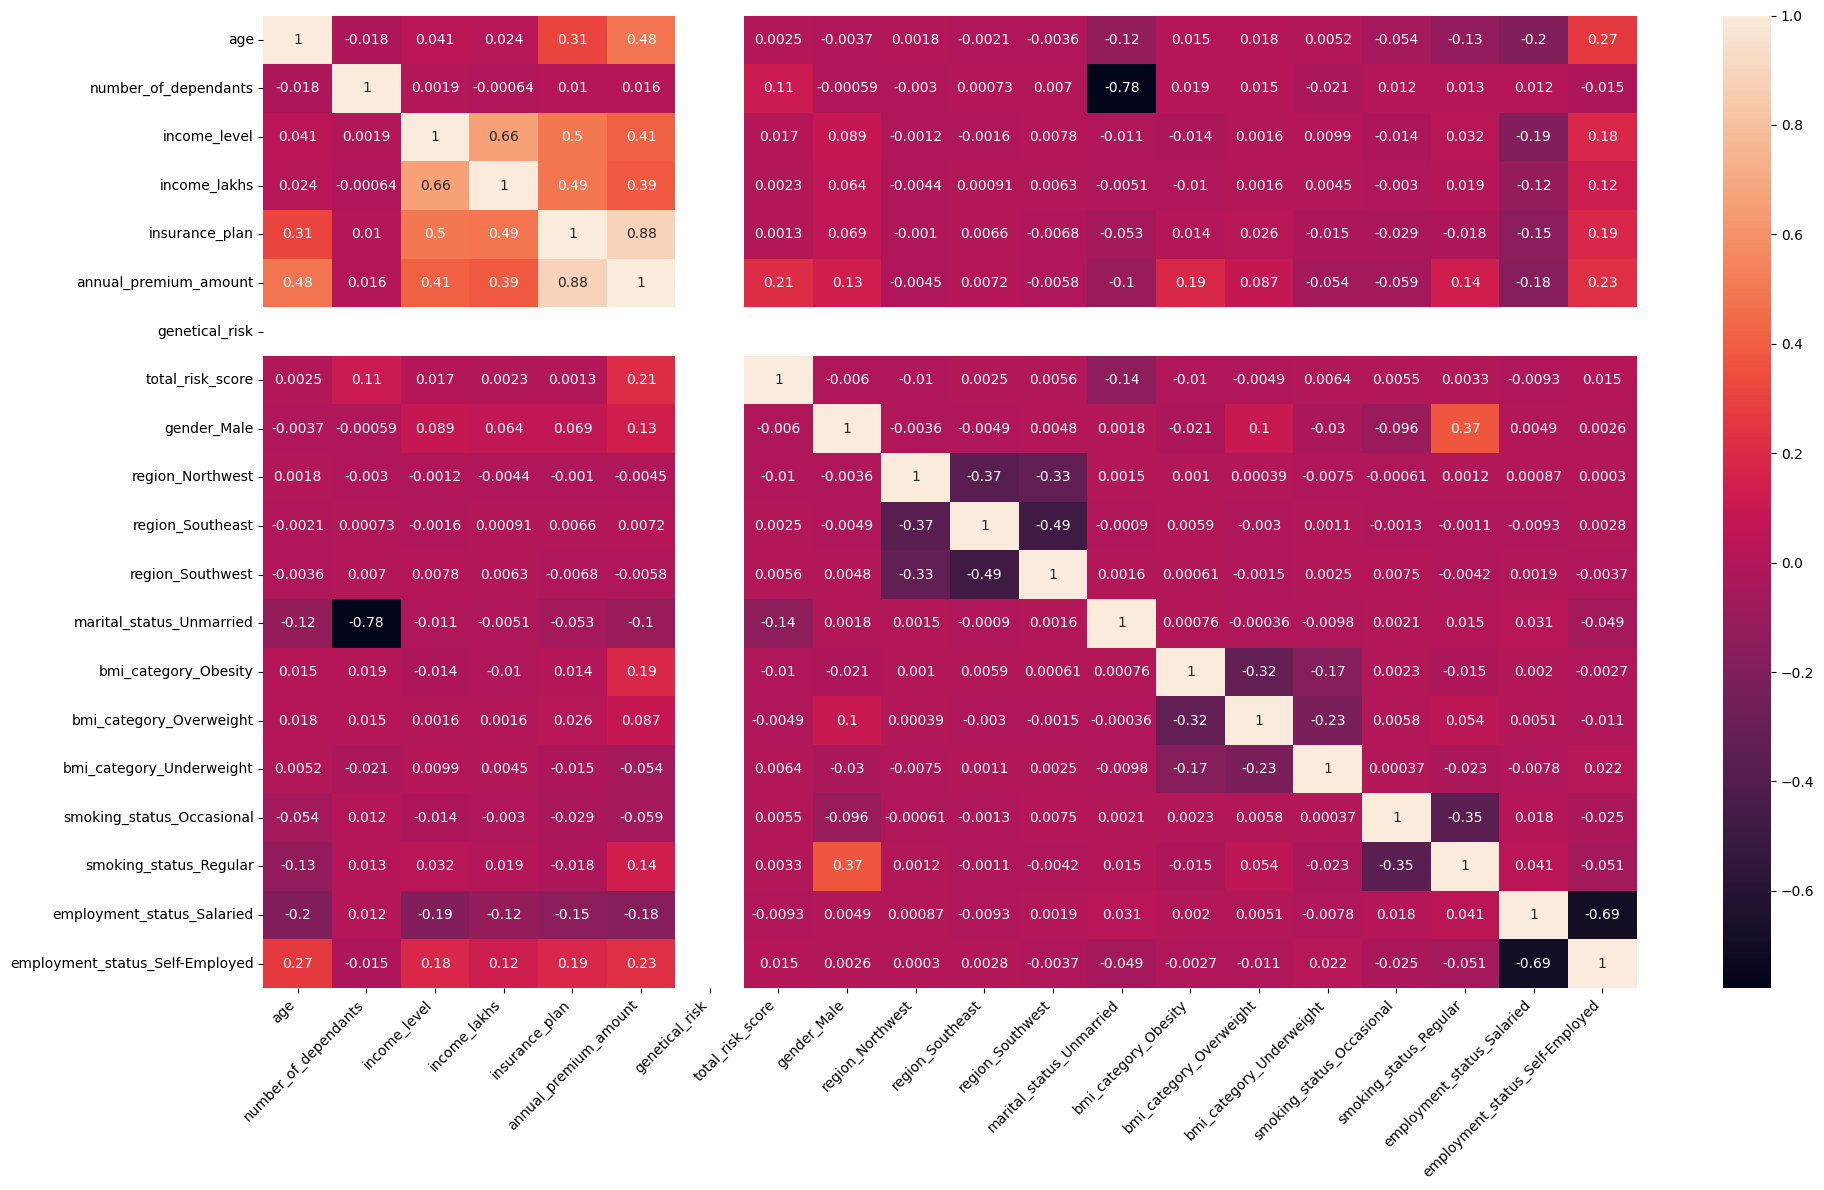

In [58]:
plt.figure(figsize=(20,12))
sns.heatmap(cm,annot=True)
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [59]:
X = df3.drop("annual_premium_amount",axis=1)
y = df3["annual_premium_amount"]
X

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,total_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,3,77,3,0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,1,0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29899,60,3,4,26,3,0,0.428571,0,1,0,0,0,0,0,0,0,0,0,1
29900,40,0,2,16,3,0,0.785714,0,0,1,0,1,0,1,0,0,1,1,0
29901,37,0,1,4,1,0,0.000000,0,1,0,0,1,1,0,0,0,0,1,0
29902,47,2,3,82,3,0,0.357143,0,0,1,0,0,0,0,0,0,0,1,0


In [60]:
cols_to_scale = ["age","number_of_dependants","income_level","income_lakhs","insurance_plan","genetical_risk"]
X[cols_to_scale] = minmax.fit_transform(df3[cols_to_scale])
X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,total_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.000000,0.050505,0.0,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.000000,0.050505,0.0,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.333333,0.191919,0.5,0.0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,0.666667,0.767677,1.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.333333,0.131313,0.0,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [61]:
def calculate_vif(data) : 
    vif_df = pd.DataFrame()
    vif_df["Column"] = data.columns
    vif_df["VIF"] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df


In [62]:
vif = calculate_vif(X)
vif

C:\Users\msart\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Column,VIF
0,age,3.882319
1,number_of_dependants,6.292550
2,income_level,4.104266
3,income_lakhs,3.797992
4,insurance_plan,4.931114
5,genetical_risk,NaN
6,total_risk_score,3.815157
7,gender_Male,2.599039
8,region_Northwest,2.124859
9,region_Southeast,2.981854


In [63]:
calculate_vif(X.drop("income_level",axis=1))

C:\Users\msart\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Column,VIF
0,age,3.863055
1,number_of_dependants,6.278147
2,income_lakhs,2.678102
3,insurance_plan,4.574625
4,genetical_risk,NaN
5,total_risk_score,3.808345
6,gender_Male,2.591439
7,region_Northwest,2.123277
8,region_Southeast,2.979899
9,region_Southwest,2.708641


In [64]:
X2 = X.drop(["income_level"],axis=1)
X2.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,total_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.050505,0.0,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.050505,0.0,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.191919,0.5,0.0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,0.767677,1.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.131313,0.0,0.0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [65]:
X_train,X_test,y_train,y_test = train_test_split(X2,y,test_size=0.3,random_state=10)

In [66]:
X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'genetical_risk', 'total_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

In [67]:
print("X Train : ", X_train.shape)
print("X Test : ", X_test.shape)
print("y Train : ", y_train.shape)
print("y Test : ", y_test.shape)

X Train :  (20875, 18)
X Test :  (8947, 18)
y Train :  (20875,)
y Test :  (8947,)


In [68]:
model_r = LinearRegression()
model_r.fit(X_train,y_train)
train_score = model_r.score(X_train,y_train)
test_score= model_r.score(X_test,y_test)
print("Train Score = ",train_score,"\nTest Score = ",test_score)

Train Score =  0.9534163989489616 
Test Score =  0.9538448451629948


In [69]:
model_r.coef_

array([ 7.01623933e+03, -1.31176470e+03, -7.08193369e+02,  1.48359882e+04,
        6.82121026e-13,  6.05362412e+03,  3.75582688e+01, -5.52508721e+01,
       -1.96225429e+01, -2.22896756e+01, -7.00320200e+02,  3.92681271e+03,
        1.97945605e+03,  6.12866236e+02,  8.37395101e+02,  2.80066184e+03,
       -4.54913671e+01,  2.43078421e+02])

In [70]:
feature_importance = model_r.coef_
coef_df = pd.DataFrame(feature_importance,columns=["Coefficients"],index=X_test.columns)
coef_df

,Coefficients
age,7.016239e+03
number_of_dependants,-1.311765e+03
income_lakhs,-7.081934e+02
insurance_plan,1.483599e+04
genetical_risk,6.821210e-13
total_risk_score,6.053624e+03
gender_Male,3.755827e+01
region_Northwest,-5.525087e+01
region_Southeast,-1.962254e+01
region_Southwest,-2.228968e+01


In [71]:
coef_df = coef_df.sort_values(by="Coefficients",ascending=True)
coef_df

,Coefficients
number_of_dependants,-1.311765e+03
income_lakhs,-7.081934e+02
marital_status_Unmarried,-7.003202e+02
region_Northwest,-5.525087e+01
employment_status_Salaried,-4.549137e+01
region_Southwest,-2.228968e+01
region_Southeast,-1.962254e+01
genetical_risk,6.821210e-13
gender_Male,3.755827e+01
employment_status_Self-Employed,2.430784e+02


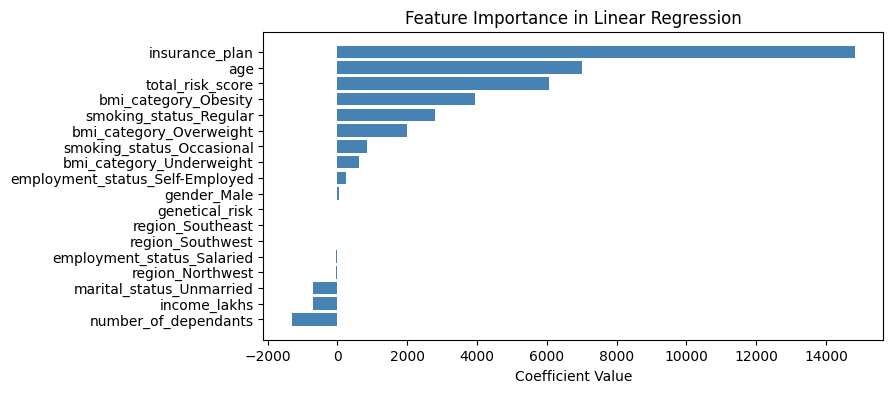

In [72]:
plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df["Coefficients"],color="steelblue")
plt.xlabel("Coefficient Value")
plt.title("Feature Importance in Linear Regression")
plt.show()

In [73]:
model_rg = Ridge()
model_rg.fit(X_train,y_train)
train_score = model_rg.score(X_train,y_train)
test_score= model_rg.score(X_test,y_test)
print("Train Score = ",train_score,"\nTest Score = ",test_score)

Train Score =  0.9534162332209687 
Test Score =  0.9538456995663842


In [74]:
# lets try diff model

In [75]:
from xgboost import XGBRegressor
model_xg = XGBRegressor()
model_xg.fit(X_train,y_train)
train_score = model_xg.score(X_train,y_train)
test_score= model_xg.score(X_test,y_test)
print("Train Score = ",train_score,"\nTest Score = ",test_score)

Train Score =  0.9986370801925659 
Test Score =  0.9979538321495056


In [76]:
model_xgb = XGBRegressor()
param_grid = {
    "n_estimators" : [20,40,50],
    "learning_rate" : [0.01,0.1,0.2],
    "max_depth" : [3,4,5]
}
random_search = RandomizedSearchCV(model_xgb,param_grid,n_iter=10,cv=3,scoring='r2',random_state=42)
random_search.fit(X_train,y_train)
random_search.best_score_,random_search.best_params_

(np.float64(0.9970577955245972),
 {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1})

In [77]:
best_model = random_search.best_estimator_
best_model.fit(X_train,y_train)
best_model.score(X_train,y_train),best_model.score(X_test,y_test)


(0.9971886277198792, 0.9970508217811584)

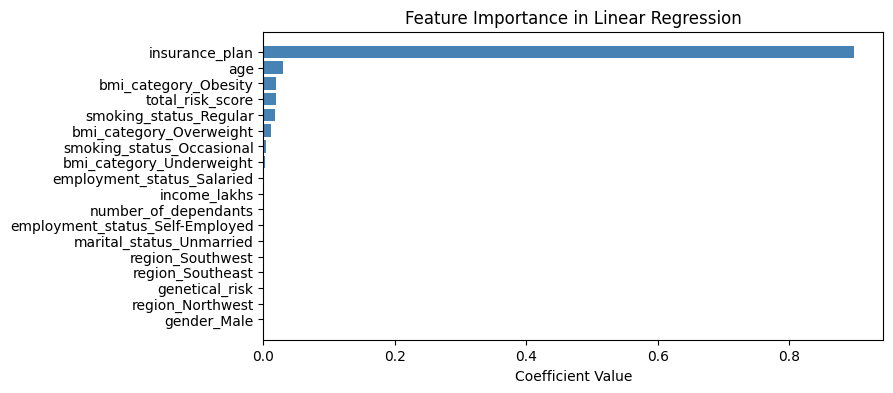

In [78]:
feature_importances = best_model.feature_importances_
coef_df = pd.DataFrame(feature_importances,columns=["Coefficients"],index=X_test.columns)
coef_df = coef_df.sort_values(by="Coefficients",ascending=True)
plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df["Coefficients"],color="steelblue")
plt.xlabel("Coefficient Value")
plt.title("Feature Importance in Linear Regression")
plt.show()

In [79]:
# feature importancw is not that good visual in XGBoost

In [80]:
# we just cant decide on the basis of r2 score

In [81]:
## we will start error analysis

In [82]:
y_pred = best_model.predict(X_test)
residuals = y_pred - y_test
residuals_pct = residuals*100 / y_test

residuals_df = pd.DataFrame({
    "actual" : y_test,
    "predicted" : y_pred,
    "diff" : residuals,
    "diff_pct" : residuals_pct
})
residuals_df.head()

,actual,predicted,diff,diff_pct
19713,26895,26691.470703,-203.529297,-0.756755
14750,22734,22650.751953,-83.248047,-0.366183
19932,21198,21581.894531,383.894531,1.810994
29643,9100,9425.934570,325.934570,3.581699
17076,26434,26691.470703,257.470703,0.974013


<Axes: xlabel='diff_pct', ylabel='Count'>

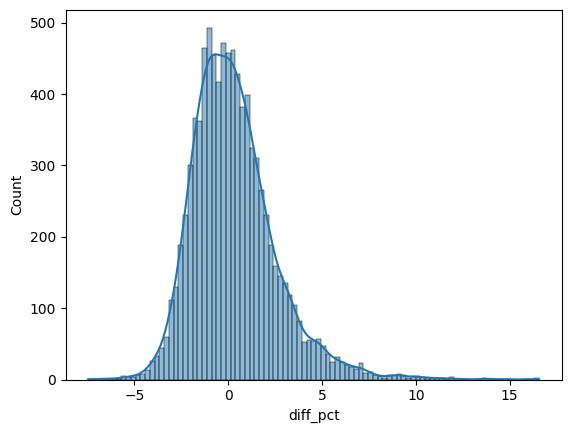

In [83]:
sns.histplot(residuals_df["diff_pct"],kde=True)

In [84]:
# it states that some errors are greater than 60 and 80 pct its not good

In [85]:
extreme_error_threshold = 10
extreme_residuals_df = residuals_df[np.abs(residuals_df["diff_pct"])>extreme_error_threshold]
extreme_residuals_df

,actual,predicted,diff,diff_pct
14286,6845,7621.263672,776.263672,11.340594
27518,8502,9425.934570,923.934570,10.867261
9285,6872,7621.263672,749.263672,10.903138
7547,6538,7621.263672,1083.263672,16.568732
21910,6651,7621.263672,970.263672,14.588237
12189,6571,7621.263672,1050.263672,15.983316
21141,10722,11841.492188,1119.492188,10.441076
16263,8206,9063.517578,857.517578,10.449885
8216,6635,7621.263672,986.263672,14.864562
13973,10583,11841.492188,1258.492188,11.891639


In [86]:
residuals_df.shape , extreme_residuals_df.shape

((8947, 4), (29, 4))

In [87]:
extreme_residuals_df.shape[0]*100 / residuals_df.shape[0] # 30 pct are errors in model

0.32413099362914943

In [88]:
X_test.index

Index([19713, 14750, 19932, 29643, 17076, 20314, 24893, 26722, 25844, 10731,
       ...
       10637,  1224, 17046, 19228,  9275,  3387,  7858,  9744,  4849,  8986],
      dtype='int64', length=8947)

In [89]:
extreme_residuals_df.index

Index([14286, 27518,  9285,  7547, 21910, 12189, 21141, 16263,  8216, 13973,
        9150, 24145, 18522,  6163, 18681, 19145, 21455, 22666,  7508, 10741,
        6517, 18834, 13744, 24119,  2695, 25658, 11019, 14037,  7654],
      dtype='int64')

In [90]:
extreme_error_df = X_test.loc[extreme_residuals_df.index]
extreme_error_df.shape

(29, 18)

In [91]:
extreme_error_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,total_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
14286,0.021739,0.6,0.050505,0.0,0.0,0.000000,1,1,0,0,1,0,0,0,0,0,1,0
27518,0.304348,0.6,0.080808,0.0,0.0,0.357143,1,1,0,0,0,0,0,0,0,0,0,1
9285,0.326087,0.6,0.010101,0.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
7547,0.347826,0.2,0.080808,0.0,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,1,0
21910,0.043478,0.6,0.020202,0.0,0.0,0.000000,1,0,1,0,0,0,0,0,0,0,0,0


In [94]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [92]:
from joblib import dump

dump(best_model,"../artifacts/model_rest.joblib")

['artifacts/model_rest.joblib']

In [93]:
scaler_with_cols = {
    "scaler" : minmax,
    "cols_to_scale" : list(cols_to_scale)
}

dump(scaler_with_cols,"../artifacts/scaler_rest.joblib")

['artifacts/scaler_rest.joblib']